In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score

### Step 1: Importing and Understanding the Data

In [ ]:
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 100)
lead_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [ ]:
lead_df.shape

(9240, 37)

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are only 7 numerical columns and remaining 30 columns are categorical columns.

In [ ]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From above we can observe that the columns namely 'TotalVisits', 'Total Time Spent on Website' & 'Page Views Per Visit' are having outliers, so we need to treat them to make the data clean.

## Step 2: Data Cleaning

In [ ]:
# Removing the unnecessary columns
redun_col = ['Prospect ID', 'Lead Number', 'Country', 'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview', 'City']

lead_cl_df = lead_df.drop(redun_col, axis=1)

In [ ]:
# Checking the dataset
lead_cl_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


In [ ]:
lead_cl_df.shape

(9240, 31)

We can see that there are some columns with labels 'Select', which means that the customer didn't select any of the given options, hence it is better to treat them as null values.

In [ ]:
# Now replacing label 'Select' with nan values
df_1 = pd.DataFrame(lead_cl_df['Specialization'])
df_2 = pd.DataFrame(lead_cl_df['How did you hear about X Education'])
df_3 = pd.DataFrame(lead_cl_df['Lead Profile'])

In [ ]:
# Replacing 'Select' label with nan values
df_1['Specialization'] = df_1['Specialization'].replace('Select', np.nan)
df_2['How did you hear about X Education'] = df_2['How did you hear about X Education'].replace('Select', np.nan)
df_3['Lead Profile'] = df_3['Lead Profile'].replace('Select', np.nan)

In [ ]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset
lead_cl_df['Specialization'] = df_1['Specialization']
lead_cl_df['How did you hear about X Education'] = df_2['How did you hear about X Education']
lead_cl_df['Lead Profile'] = df_3['Lead Profile']

In [ ]:
# Checking the null values
round(100*lead_cl_df.isnull().sum()/len(lead_cl_df),2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
Specialization,36.58


Dropping the columns having more than 35% of the null values

In [ ]:
lead_cl_df_drop = lead_cl_df.loc[:, lead_cl_df.isnull().mean() > 0.35]
lead_cl_df_drop_1 = list(lead_cl_df_drop.keys())
lead_cl_df = lead_cl_df.drop(lead_cl_df_drop_1, axis=1)

In [ ]:
# Checking the null values
round(100*lead_cl_df.isnull().sum()/len(lead_cl_df),2)

,0
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48
Last Activity,1.11
What is your current occupation,29.11


In [ ]:
# Checking the shape
lead_cl_df.shape

(9240, 22)

Checking those columns having less than 35% of null values and imputing there respective values

In [ ]:
# Checking the Lead Source column
lead_cl_df['Lead Source'].value_counts().head()

,count
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534


Since 'Google' is having a higher number of occurences so, we will impute the null values with 'Google'.

In [ ]:
# Checking the Total Visits column
lead_cl_df['TotalVisits'].value_counts().head()

,count
TotalVisits,
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783


Since the most occuring value here is '0.0', therefore we will impute the missing values with '0.0'.

In [ ]:
# Checking the Page Views Per Visit column
lead_cl_df['Page Views Per Visit'].value_counts().head()

,count
Page Views Per Visit,
0.0,2189
2.0,1795
3.0,1196
4.0,896
1.0,651


Since the most occuring value here is '0.0', therefore we will impute the missing values with '0.0'.

In [ ]:
# Checking the Last Activity column
lead_cl_df['Last Activity'].value_counts().head()

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428


Since the most occuring value here is 'Email Opened', therefore we will impute the missing values with 'Email Opened'.

In [ ]:
# Checking the What is your current occupation column
lead_cl_df['What is your current occupation'].value_counts()

,count
What is your current occupation,
Unemployed,5600
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


Since the most occuring value here is 'Unemployed', therefore we will impute the missing values with 'Unemployed'.

In [ ]:
# Checking the What matters most to you in choosing a course column
lead_cl_df['What matters most to you in choosing a course'].value_counts().head()

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


Since the most occuring value here is 'Better Career Prospects', therefore we will impute the missing values with 'Better Career Prospects'.

In [ ]:
# Now imputing the missing values as per their respective values.
missing_val = {'Lead Source':'Google', 'TotalVisits':'0.0', 'Page Views Per Visit':'0.0', 'Last Activity':'Email Opened',
              'What is your current occupation':'Unemployed',
               'What matters most to you in choosing a course':'Better Career Prospects'}

lead_cl_df = lead_cl_df.fillna(value = missing_val)

In [ ]:
# Checking the null values once more
lead_cl_df.isnull().sum()

,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0
What is your current occupation,0


Now there are no null values present in the dataset.

In [ ]:
# Checking the Lead Source column for any spelling mistake
lead_cl_df['Lead Source'].value_counts()

,count
Lead Source,
Google,2904
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


We found that '__Google__' is being misprinted as '__google__' which is making a duplicate in our data and can harm our analysis. We need to treat it to make it same as '__Google__'.

In [ ]:
# Treating the misprinted word
lead_cl_df['Lead Source'] = lead_cl_df['Lead Source'].apply(lambda x:x.capitalize())
lead_cl_df['Lead Source'].value_counts()

,count
Lead Source,
Google,2909
Direct traffic,2543
Olark chat,1755
Organic search,1154
Reference,534
Welingak website,142
Referral sites,125
Facebook,55
Bing,6


Now our dataset is good for the further analysis as all the values and this is our final step for the data cleaning.

## Step 3: Data Transformation

Now converting the columns having '__Yes / No__' to '__1 / 0__'

In [ ]:
# Yes : 1
# No : 0

category = {'Yes':1, 'No':0}

# Do not Email column
lead_cl_df['Do Not Email'] = lead_cl_df['Do Not Email'].map(category)

# Do Not Call column
lead_cl_df['Do Not Call'] = lead_cl_df['Do Not Call'].map(category)

# Magazine column
lead_cl_df['Magazine'] = lead_cl_df['Magazine'].map(category)

# Search column
lead_cl_df['Search'] = lead_cl_df['Search'].map(category)

# Newspaper Article column
lead_cl_df['Newspaper Article'] = lead_cl_df['Newspaper Article'].map(category)

# X Education Forums column
lead_cl_df['X Education Forums'] = lead_cl_df['X Education Forums'].map(category)

# Newspaper column
lead_cl_df['Newspaper'] = lead_cl_df['Newspaper'].map(category)

# Digital Advertisement column
lead_cl_df['Digital Advertisement'] = lead_cl_df['Digital Advertisement'].map(category)

# Through Recommendations column
lead_cl_df['Through Recommendations'] = lead_cl_df['Through Recommendations'].map(category)

# Receive More Updates About Our Courses column
lead_cl_df['Receive More Updates About Our Courses'] = lead_cl_df['Receive More Updates About Our Courses'].map(category)

# Update me on Supply Chain Content column
lead_cl_df['Update me on Supply Chain Content'] = lead_cl_df['Update me on Supply Chain Content'].map(category)

# Get updates on DM Content column
lead_cl_df['Get updates on DM Content'] = lead_cl_df['Get updates on DM Content'].map(category)

In [ ]:
lead_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

## Step 4: Exploratory Data Analysis

In [ ]:
# Lets start with the target variable and see if we have any data imbalance or not
lead_cl_df["Converted"].value_counts(normalize=True)

,proportion
Converted,
0,0.61461
1,0.38539


We have good representation of both the classes of data and hence we are good to go with the further analysis

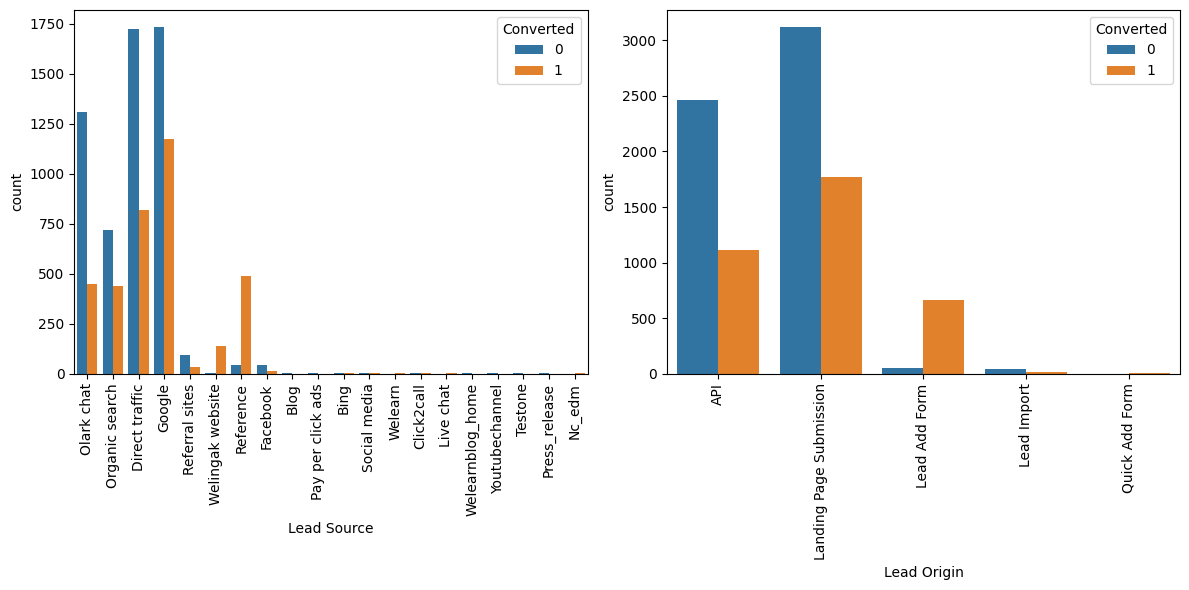

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    ax = axes[i]
    sns.countplot(x=feature, hue="Converted", data=lead_cl_df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

**OBSERVATION :**

__(Lead Source):__
- The count of leads from Google and Direct traffic is maximum.
- The conversion rate of the leads from Reference and Welingak website is maximum.

**To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark chat', 'Organic search', 'Direct traffic' and also increasing the number of leads from 'Reference' and 'Welingak website'**

__(Lead Origin):__
- API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
- Lead Import has very less count as well as conversion rate and hence can be ignored

**To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'**

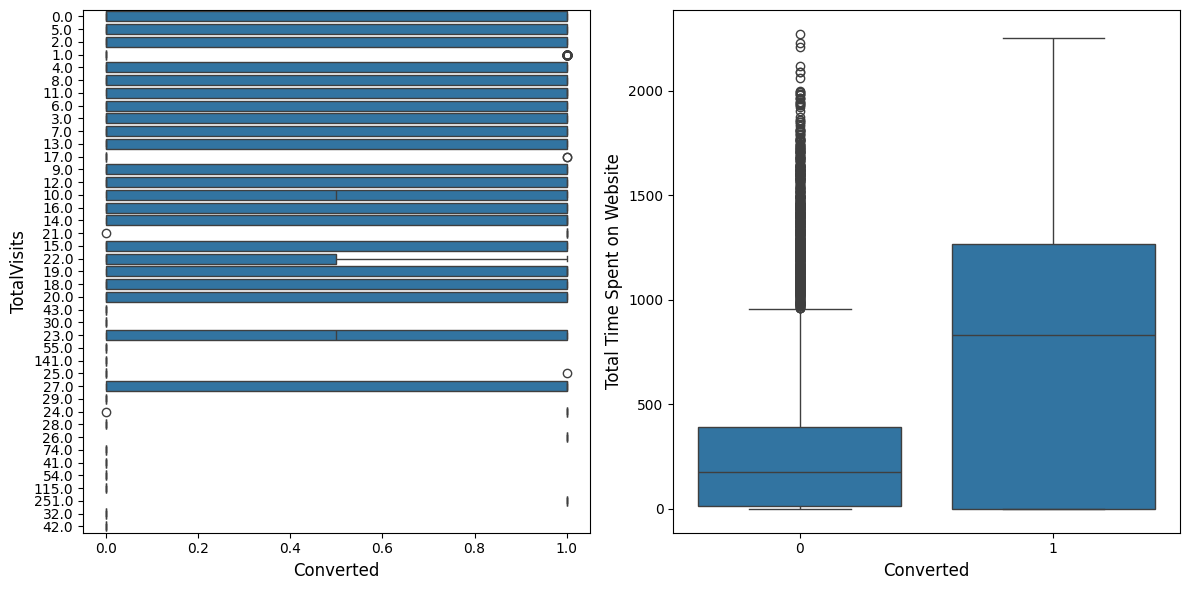

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

features = ["TotalVisits", "Total Time Spent on Website"]

for i, feature in enumerate(features):
    sns.boxplot(y=feature, x='Converted', data=lead_cl_df, ax=axes[i])
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].set_xlabel('Converted', fontsize=12)

plt.tight_layout()
plt.show()

**OBSERVATION :**

__(Total Time Spent on Website:)__

 Users spending more time on the website are more likely to get converted.

**Websites can be made more appealing so as to increase the time of the Users on websites.**

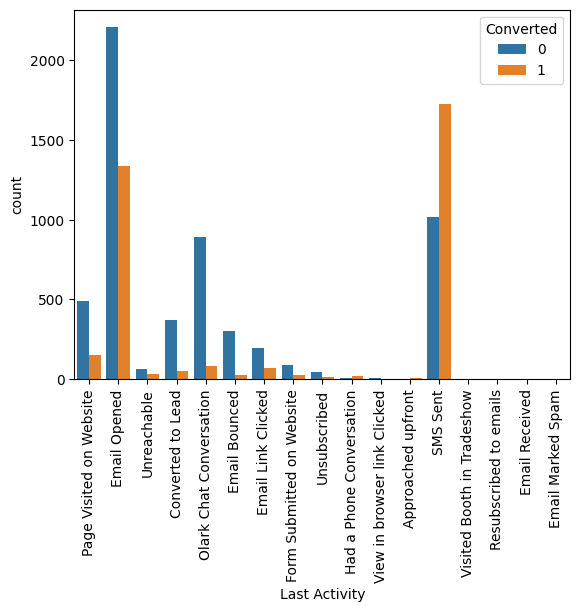

In [ ]:
# Plotting the Last Activity
sns.countplot(x="Last Activity", hue="Converted", data= lead_cl_df)
plt.xticks(rotation='vertical')
plt.show()

**OBSERVATION:**

- The count of 'Email Opened' is high.
- The conversion rate of 'SMS sent' is maximum.

**We should focus on increasing the conversion rate of those having last activity as 'Email Opened' by making a call to those leads and also try to increase the count of the ones having last activity as 'SMS sent'.**

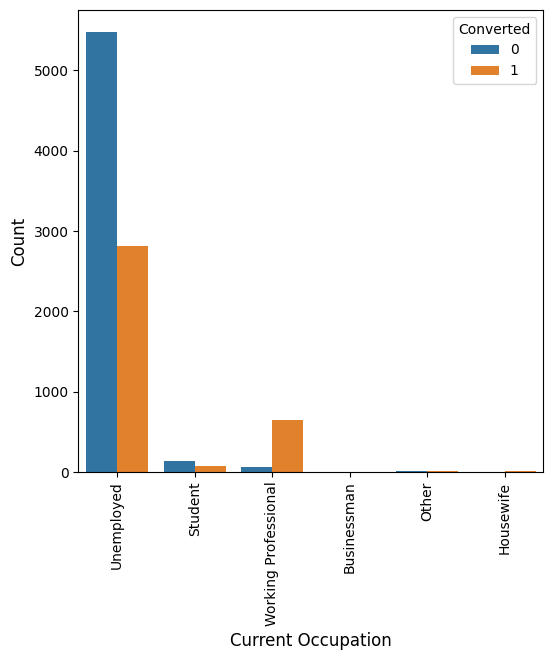

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x="What is your current occupation", hue="Converted", data=lead_cl_df)
plt.xticks(rotation=90)
plt.xlabel("Current Occupation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

**OBSERVATION:**

- Looking at above plot, we can say that working professionals have high conversion rate.
- Number of Unemployed leads are more than any other category.

**To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads.**

In [ ]:
# Creating dummy variables
dummy = pd.get_dummies(lead_cl_df[['Lead Origin','Lead Source','Last Activity'
                                   ,'What is your current occupation', 'What matters most to you in choosing a course',
                                   'Last Notable Activity']], drop_first=True)

# Adding the dummies to the original dataset
lead_cl_df = pd.concat([lead_cl_df,dummy], axis=1)

In [ ]:
lead_cl_df.shape

(9240, 83)

 Now removing the __Duplicate columns__

In [ ]:
# We have created a dummies for the below categories hence removing the original column.
dup = ['Lead Origin','Lead Source','Last Activity' ,'What is your current occupation',
       'What matters most to you in choosing a course','Last Notable Activity']

lead_cl_df = lead_cl_df.drop(dup, axis=1)
lead_cl_df.shape

(9240, 77)

In [ ]:
# Removing redundant columns from the dataset
redun = ['Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','Magazine']

lead_cl_df = lead_cl_df.drop(redun, axis=1)

In [ ]:
# Converting some categorical variables to numerical variables
lead_cl_df['TotalVisits'] = lead_cl_df['TotalVisits'].astype('float64')
lead_cl_df['Page Views Per Visit'] = lead_cl_df['Page Views Per Visit'].astype('float64')

In [ ]:
lead_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

Till here we have changed all the datatypes to numeric types.

 Checking for Outliers

In [ ]:
round(lead_cl_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95,0.99]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,0.00,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00


 We can say that '__TotalVisits__' & '__Page Views Per Visit__' have outliers in them and we need to treat them to make our dataset fit for the analysis.

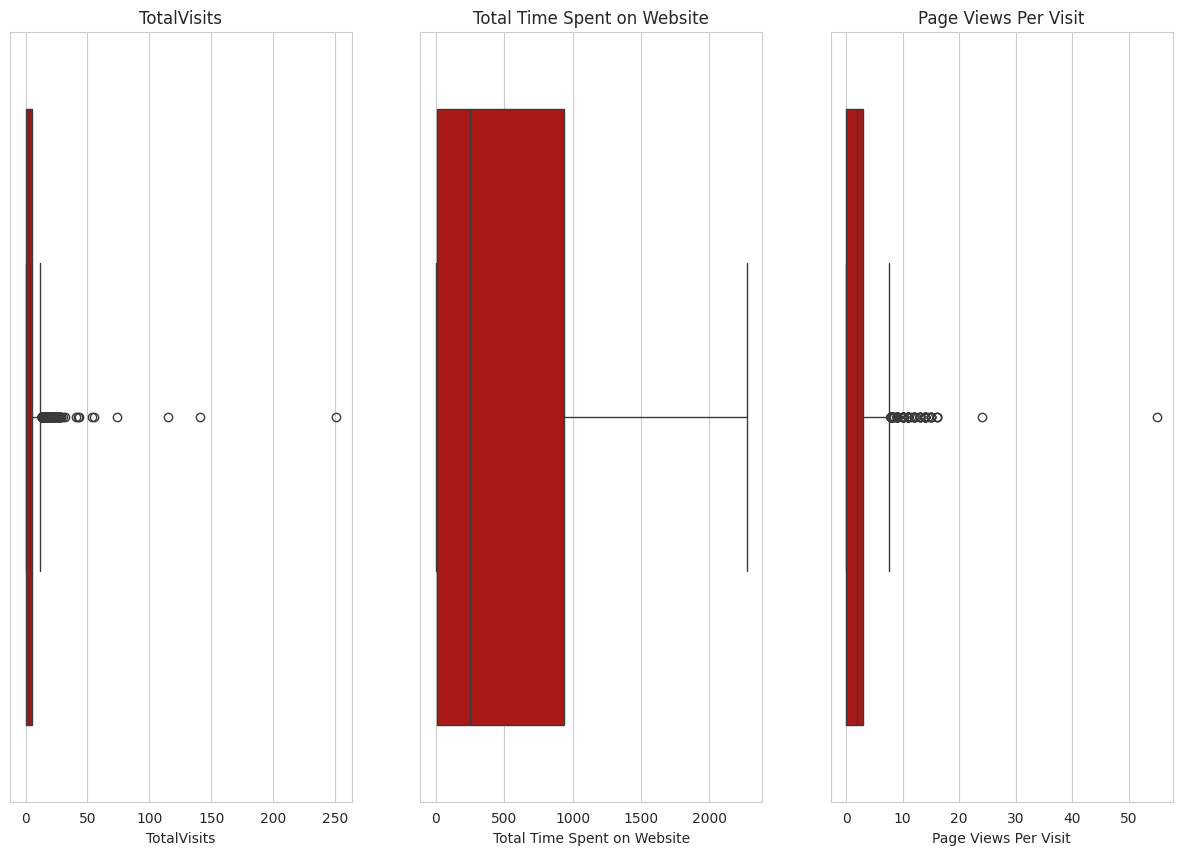

In [ ]:
# Visualizing the outliers
plt.figure(figsize=[15,10])
plt.tight_layout()
sns.set_style('whitegrid')

plt.subplot(1,3,1)
sns.boxplot(data = lead_cl_df, x = 'TotalVisits', palette='gist_heat', orient='v')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data = lead_cl_df, x = 'Total Time Spent on Website', palette='gist_heat', orient='v')
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot(data = lead_cl_df, x = 'Page Views Per Visit', palette='gist_heat', orient='v')
plt.title('Page Views Per Visit')

plt.show()

 From the above boxplots we can observe two outlier variables in our dataset __'TotalVisits' and 'Page Views Per Visit'__. We need to do a 0.99-0.1 analysis in order to correct the outliers.

In [ ]:
lead_cl_df['TotalVisits'].describe()

,TotalVisits
count,9240.000000
mean,3.394156
std,4.836682
min,0.000000
25%,0.000000
50%,3.000000
75%,5.000000
max,251.000000


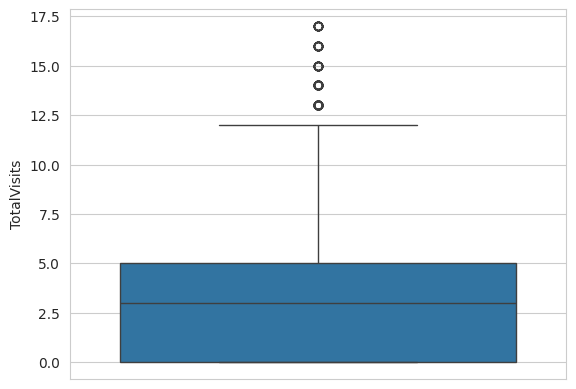

In [ ]:
#Outlier Treatment: Removing top and bottom 1% of the Column Outlier values
Q3 = lead_cl_df.TotalVisits.quantile(0.99)
lead_cl_df = lead_cl_df[(lead_cl_df.TotalVisits <= Q3)]

Q1 = lead_cl_df.TotalVisits.quantile(0.01)
lead_cl_df = lead_cl_df[(lead_cl_df.TotalVisits >= Q1)]

sns.boxplot(y=lead_cl_df['TotalVisits'])
plt.show()

In [ ]:
lead_cl_df['Page Views Per Visit'].describe()

,Page Views Per Visit
count,9157.000000
mean,2.302302
std,2.066450
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,16.000000


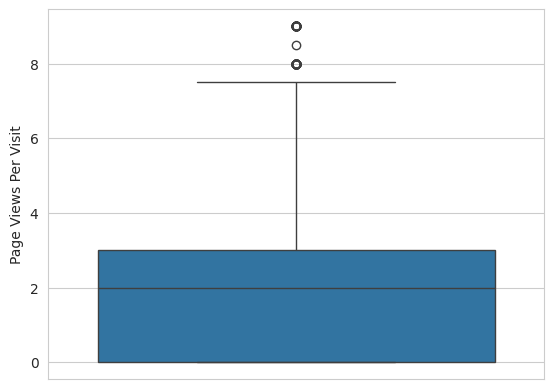

In [ ]:
#Outlier Treatment: Removing top & bottom 1% of the Column Outlier values
Q3 = lead_cl_df['Page Views Per Visit'].quantile(0.99)
lead_cl_df = lead_cl_df[lead_cl_df['Page Views Per Visit'] <= Q3]

Q1 = lead_cl_df['Page Views Per Visit'].quantile(0.01)
lead_cl_df = lead_cl_df[lead_cl_df['Page Views Per Visit'] >= Q1]

sns.boxplot(y=lead_cl_df['Page Views Per Visit'])
plt.show()

In [ ]:
lead_cl_df['Page Views Per Visit'].describe()

,Page Views Per Visit
count,9090.000000
mean,2.232693
std,1.901055
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,9.000000


 The outliers have been removed from the dataset, now our data is clean and free from outliers.

## Step 5: Data Preparation

### Train-Test Split

In [ ]:
# Separating the Target Variable
y = lead_cl_df['Converted']
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Remaining dataset
X = lead_cl_df.drop('Converted', axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,0,0,0,0,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Fals

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

### Feature Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
# Scaling the Total Time Spent on Website for the easy analysis.
X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

In [ ]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
302,0,0,7.0,-0.428736,2.33,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6087,1,0,0.0,-0.887355,0.00,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1033,0,0,5.0,-0.025151,5.00,0,0,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
7656,1,0,6.0,-0.241619,6.00,0,0,0,0,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3241,0,0,4.0,0.897591,1.33,0,0,0,0,0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [ ]:
# Checking the conversion rate from 'Converted' column
round((sum(y)/len(y.index)*100),2)

38.45

 We have a conversion rate of __38.45 %__.

### Correlation of the dataset

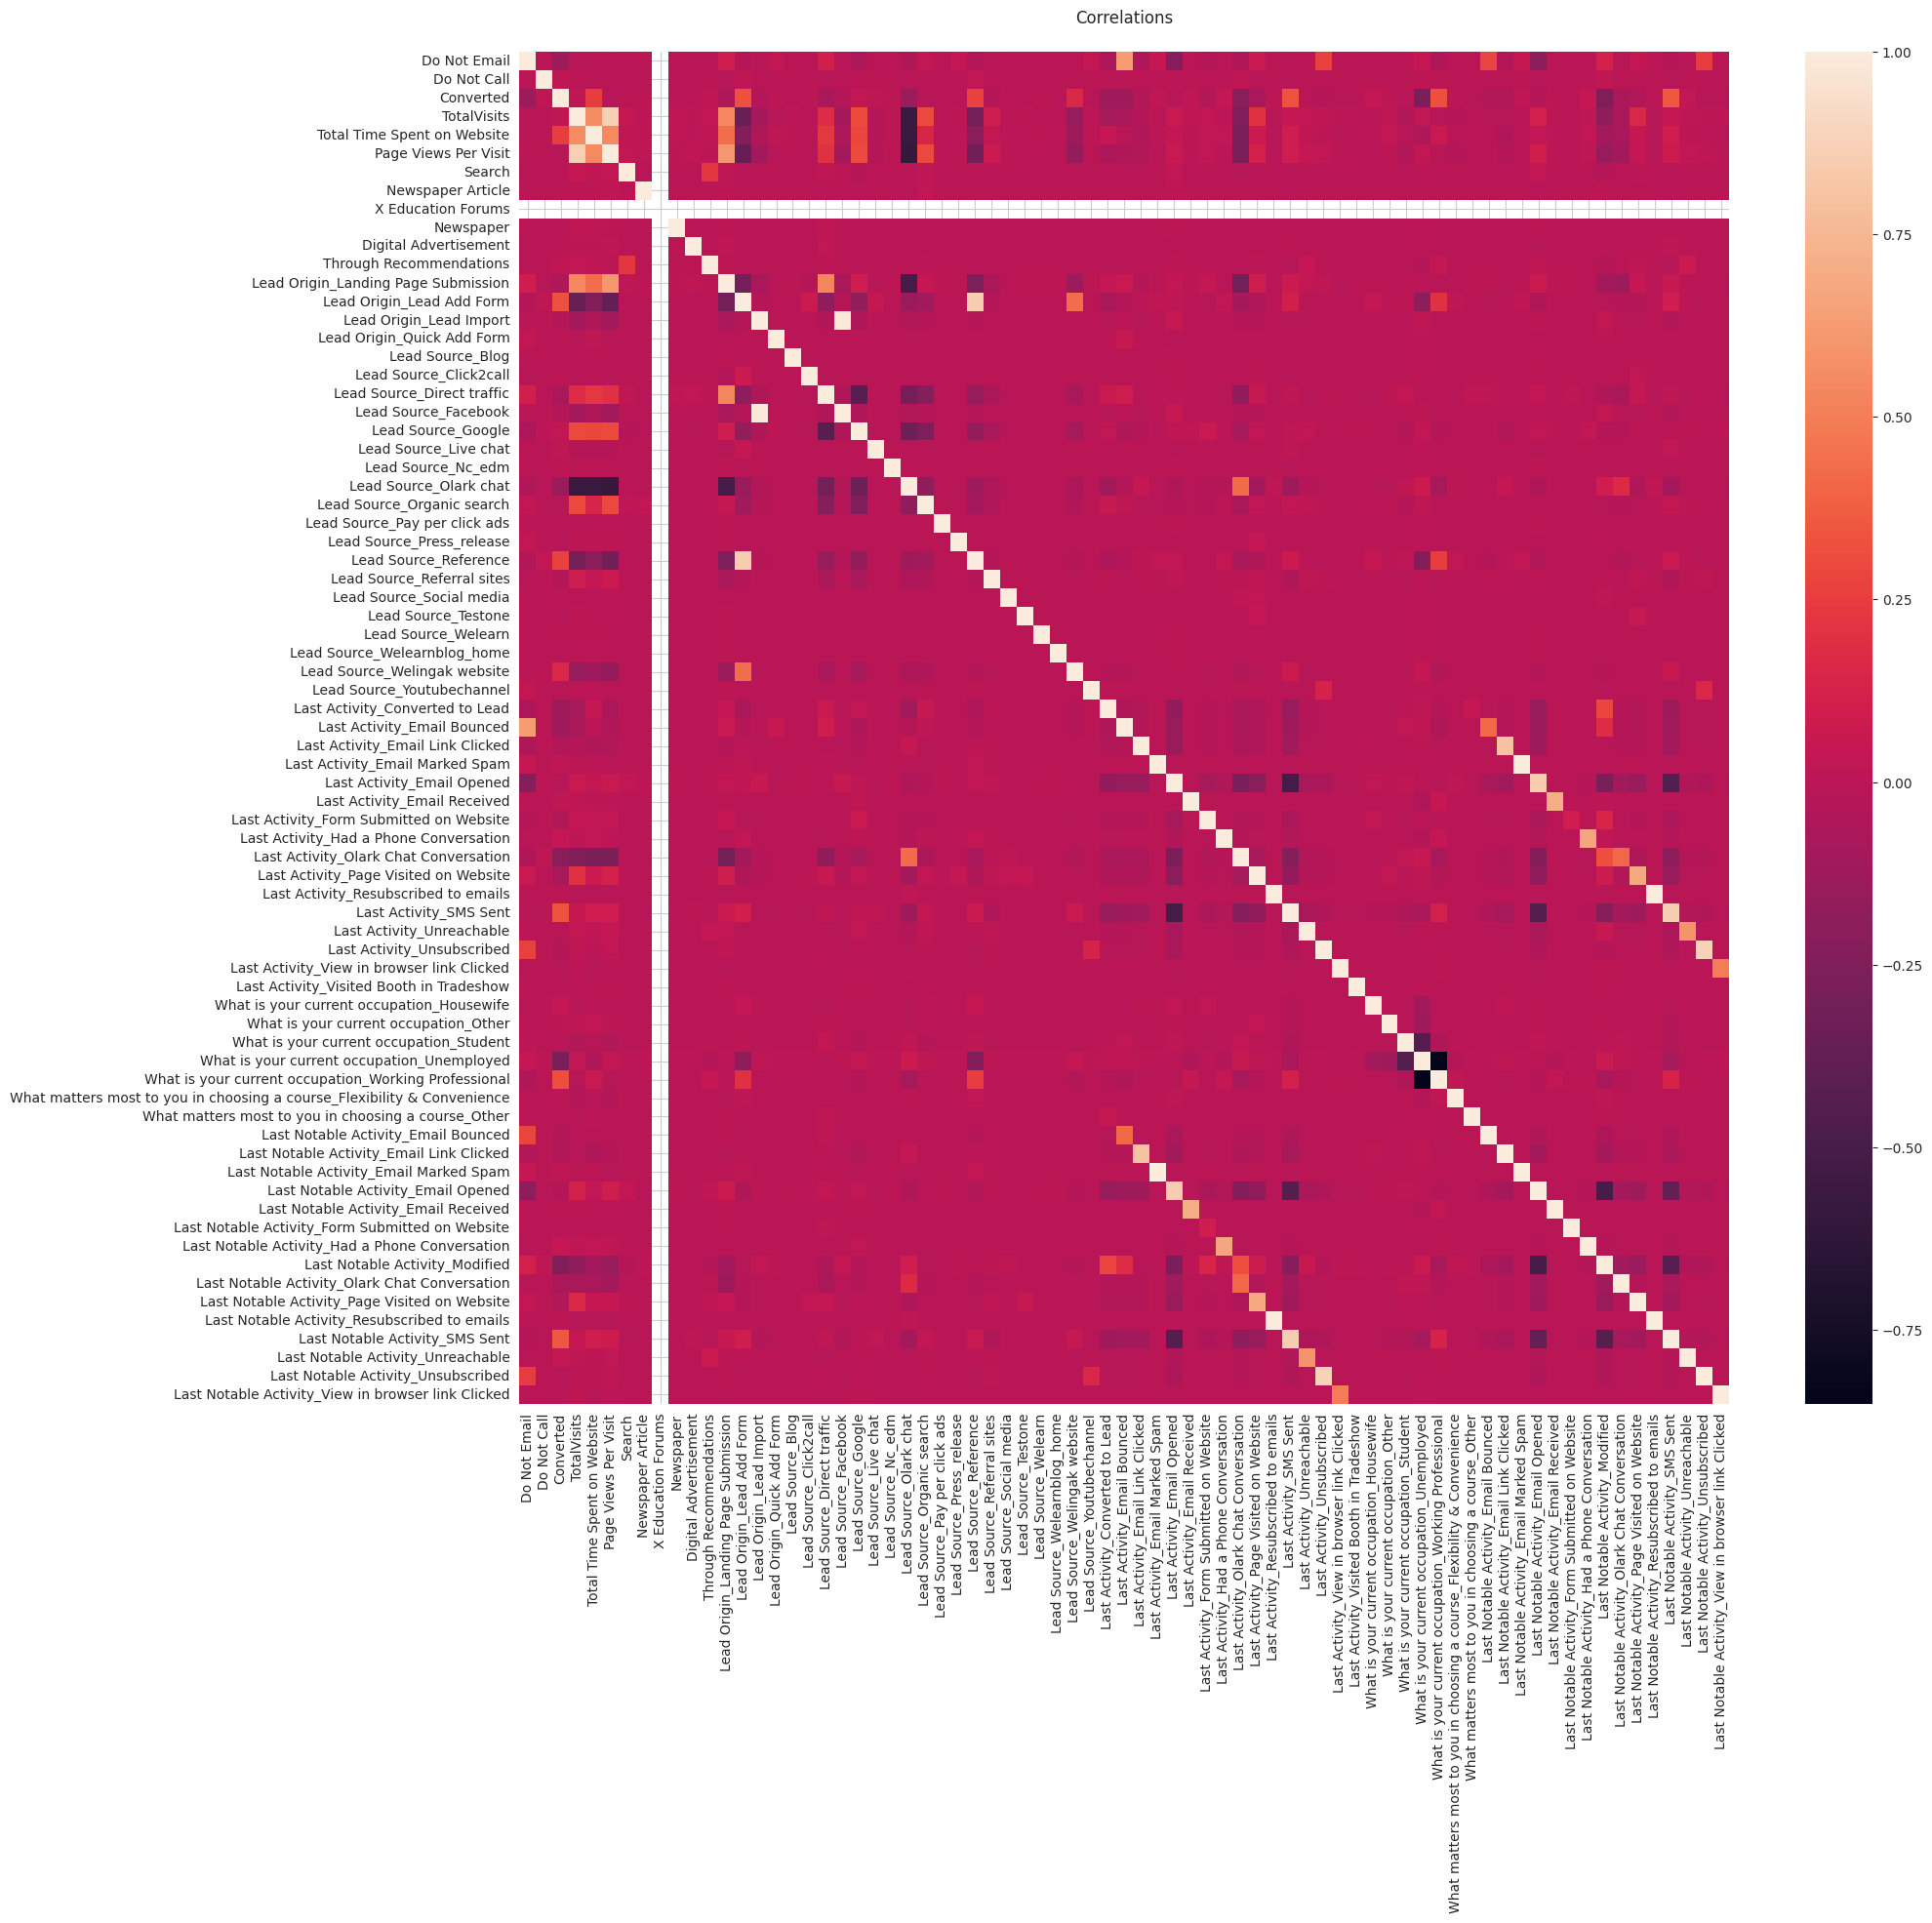

In [ ]:
# With the help of Heatmap we can identify the high correlated data.
plt.figure(figsize=[20,18])
sns.heatmap(lead_cl_df.corr(method='spearman'))
plt.title('Correlations\n')
plt.show()

In [ ]:
# Here, X Education Forums has no data so, it is better to remove from the dataset.
# Also, we need to remove the highly correlated value
high_corr = ['X Education Forums','Lead Source_Olark chat', 'What is your current occupation_Unemployed']
X_train = X_train.drop(high_corr,axis=1)
X_test = X_test.drop(high_corr,axis=1)

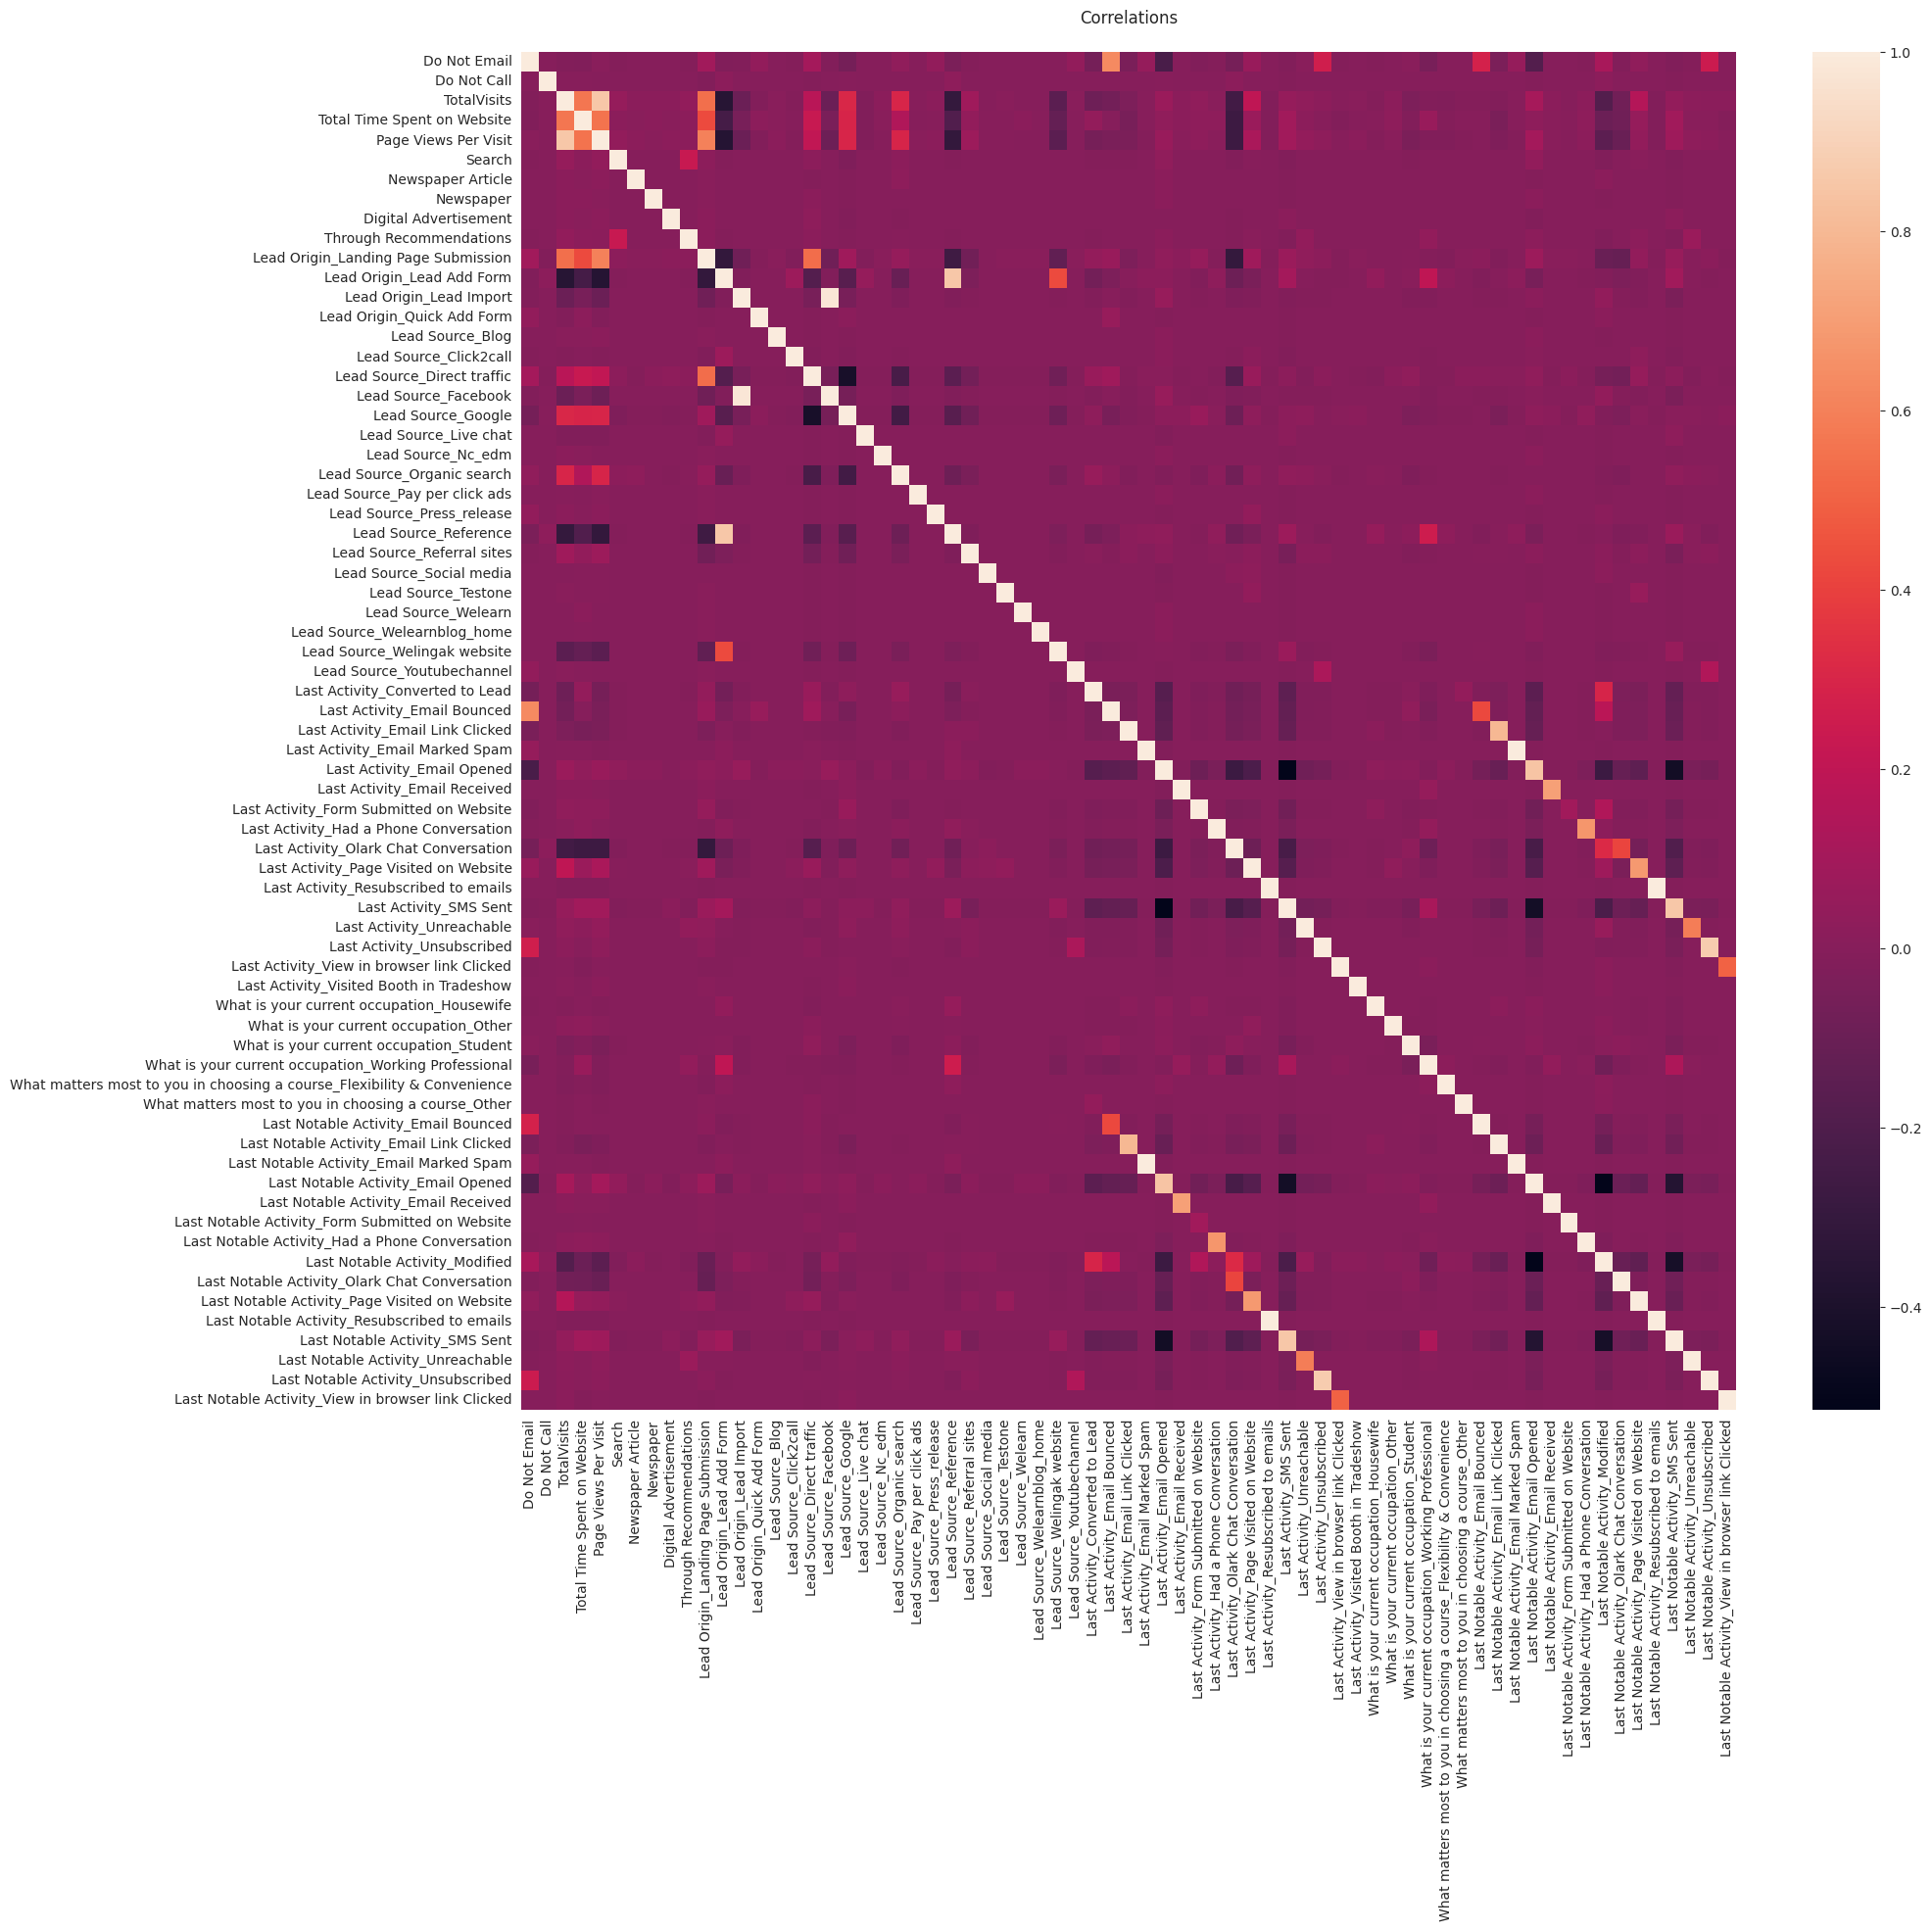

In [ ]:
# Checking for the correlation again
plt.figure(figsize=[20,18])
sns.heatmap(lead_cl_df[X_train.columns].corr(method='spearman'))
plt.title('Correlations\n')
plt.show()

 We have removed some of the correlated and null columns but it is quiet difficult to spot the high correlation attributes. We will start building the model and with the help of VIFs and p-Value we will find out the relations.

## Step 6: Building the Model

In [ ]:
X_train = X_train.astype(int)
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['familt']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6299
Model Family:                Gaussian   Df Model:                           63
Link Function:               Identity   Scale:                         0.14609
Method:                          IRLS   Log-Likelihood:                -2876.8
Date:                Mon, 17 Feb 2025   Deviance:                       920.22
Time:                        10:50:36   Pearson chi2:                     920.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4649
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.8611      0.383      2.250      0.024       0.111       1.611
Do Not Email                                                               -0.1851      0.025     -7.311      0.000      -0.235      -0.135
Do Not Call                                                                 0.5060      0.271      1.868      0.062      -0.025       1.037
TotalVisits                                                                 0.0176      0.002      7.077      0.000       0.013       0.022
Total Time Spent on Website                                                 0.2280      0.009     24.592      0.000       0.210       0.246
Page Views Per Visit                                                       -0.0150      0.004     -3.680      0.000      -0.023      -0.007
Search                                                                      0.1402      0.157      0.896      0.370      -0.167       0.447
Newspaper Article                                                           0.8389      0.383      2.188      0.029       0.088       1.590
Newspaper                                                                  -0.7632      0.383     -1.993      0.046      -1.514      -0.013
Digital Advertisement                                                      -0.1002      0.221     -0.453      0.650      -0.534       0.333
Through Recommendations                                                     0.2620      0.223      1.174      0.240      -0.175       0.699
Lead Origin_Landing Page Submission                                        -0.0155      0.015     -1.055      0.291      -0.044       0.013
Lead Origin_Lead Add Form                                                   0.4801      0.083      5.762      0.000       0.317       0.643
Lead Origin_Lead Import                                                     0.4785      0.390      1.228      0.219      -0.285       1.242
Lead Origin_Quick Add Form                                                  0.2808      0.384      0.730      0.465      -0.473       1.034
Lead Source_Blog                                                        -2.697e-16    8.2e-16     -0.329      0.742   -1.88e-15    1.34e-15
Lead Source_Click2call                                                      0.0581      0.284      0.204      0.838      -0.499       0.616
Lead Source_Direct traffic                                                 -0.0865      0.022     -4.023      0.000      -0.129      -0.044
Lead Source_Facebook                                                       -0.6179      0.384     -1.608      0.108      -1.371       0.135
Lea

 There are many attributes having an insignificant p-values and we will try out the RFE for the feature elimination.

**RFE**

In [ ]:
logreg = LogisticRegression()
rfem = RFE(logreg, n_features_to_select=19) # Running with 19 variables
rfem = rfem.fit(X_train, y_train)
rfem.support_  # Checking for the true and false for the varibales after rfe

array([ True,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [ ]:
# Selecting the 'True' columns in rfem.support_
col = X_train.columns[rfem.support_]
X_train_1 = sm.add_constant(X_train[col]) # Adding constant

##### Model 1

In [ ]:
logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2826.0
Date:                Mon, 17 Feb 2025   Deviance:                       5652.0
Time:                        10:50:41   Pearson chi2:                 6.46e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3569
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1776      0.066      2.707      0.007       0.049       0.306
Do Not Email                                            -1.6441      0.168     -9.775      0.000      -1.974      -1.314
Do Not Call                                             23.6883   5.59e+04      0.000      1.000    -1.1e+05     1.1e+05
Total Time Spent on Website                              1.2718      0.062     20.545      0.000       1.150       1.393
Newspaper Article                                       25.1775   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                                2.8887      0.190     15.218      0.000       2.517       3.261
Lead Source_Welingak website                             3.0029      1.033      2.908      0.004       0.979       5.027
Last Activity_Converted to Lead                         -0.9946      0.207     -4.795      0.000      -1.401      -0.588
Last Activity_Olark Chat Conversation                   -1.1440      0.184     -6.222      0.000      -1.504      -0.784
Last Activity_View in browser link Clicked             -23.5419    3.5e+04     -0.001      0.999   -6.86e+04    6.86e+04
What is your current occupation_Housewife               24.1240   2.35e+04      0.001      0.999   -4.61e+04    4.61e+04
What is your current occupation_Other                    1.2427      0.690      1.802      0.072      -0.109       2.594
What is your current occupation_Working Professional     2.8460      0.185     15.373      0.000       2.483       3.209
Last Notable Activity_Email Bounced                     -2.1930      0.760     -2.885      0.004      -3.683      -0.703
Last Notable Activity_Email Link Clicked                -1.9298      0.256     -7.552      0.000      -2.431      -1.429
Last Notable Activity_Email Opened                      -1.4457      0.084    -17.149      0.000      -1.611      -1.280
Last Notable Activity_Had a Phone Conversation          22.7377   2.59e+04      0.001      0.999   -5.07e+04    5.07e+04
Last Notable Activity_Modified                          -1.7891      0.095    -18.743      0.000      -1.976      -1.602
Last Notable Activity_Olark Chat Conversation           -1.4629      0.347     -4.211      0.000      -2.144      -0.782
Last Notable Activity_Page Visited on Website           -1.6782      0.190     -8.811      0.000      -2.052      -1.305
========================================================================================================================
"""

There are some features which have high p-value. Hence we will remove them until we get a desired value.

**VIF**

In [ ]:
# Creating VIF Dataframe
vif = pd.DataFrame()
# Adding features
vif['Features'] = X_train_1[col].columns
# Calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
# Rounding the VIF values
vif['VIF']=round(vif['VIF'],2)
# Sorting the VIF values
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
16,Last Notable Activity_Modified,1.90
7,Last Activity_Olark Chat Conversation,1.77
4,Lead Origin_Lead Add Form,1.44
17,Last Notable Activity_Olark Chat Conversation,1.36
5,Lead Source_Welingak website,1.29
6,Last Activity_Converted to Lead,1.22
0,Do Not Email,1.21
2,Total Time Spent on Website,1.16
11,What is your current occupation_Working Profes...,1.15
14,Last Notable Activity_Email Opened,1.09


 As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

In [ ]:
# Dropping 'What is your current occupation_Housewife' based on its high p-value.
X_train_2 = X_train_1.drop(['What is your current occupation_Housewife'],axis=1)

#### Model 2

In [ ]:
# Creating a new model
X_train_2 = sm.add_constant(X_train_2)
logis2 = sm.GLM(y_train,X_train_2,families=sm.families.Binomial())
reg2 = logis2.fit()
reg2.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Gaussian   Df Model:                           18
Link Function:               Identity   Scale:                         0.14901
Method:                          IRLS   Log-Likelihood:                -2962.5
Date:                Mon, 17 Feb 2025   Deviance:                       945.33
Time:                        10:50:41   Pearson chi2:                     945.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4438
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5125      0.011     46.496      0.000       0.491       0.534
Do Not Email                                            -0.2092      0.020    -10.703      0.000      -0.247      -0.171
Do Not Call                                              0.5407      0.273      1.978      0.048       0.005       1.076
Total Time Spent on Website                              0.2292      0.009     25.099      0.000       0.211       0.247
Newspaper Article                                        0.7992      0.386      2.070      0.038       0.042       1.556
Lead Origin_Lead Add Form                                0.4295      0.021     20.523      0.000       0.388       0.471
Lead Source_Welingak website                             0.2187      0.043      5.084      0.000       0.134       0.303
Last Activity_Converted to Lead                         -0.1397      0.025     -5.588      0.000      -0.189      -0.091
Last Activity_Olark Chat Conversation                   -0.1415      0.020     -7.217      0.000      -0.180      -0.103
Last Activity_View in browser link Clicked              -0.3713      0.193     -1.921      0.055      -0.750       0.008
What is your current occupation_Other                    0.2393      0.122      1.956      0.050      -0.000       0.479
What is your current occupation_Working Professional     0.3703      0.019     19.514      0.000       0.333       0.407
Last Notable Activity_Email Bounced                     -0.3097      0.068     -4.532      0.000      -0.444      -0.176
Last Notable Activity_Email Link Clicked                -0.3440      0.037     -9.293      0.000      -0.417      -0.271
Last Notable Activity_Email Opened                      -0.2631      0.013    -19.606      0.000      -0.289      -0.237
Last Notable Activity_Had a Phone Conversation           0.3443      0.137      2.515      0.012       0.076       0.613
Last Notable Activity_Modified                          -0.3117      0.014    -22.079      0.000      -0.339      -0.284
Last Notable Activity_Olark Chat Conversation           -0.2926      0.040     -7.385      0.000      -0.370      -0.215
Last Notable Activity_Page Visited on Website           -0.3061      0.028    -10.829      0.000      -0.362      -0.251
========================================================================================================================
"""

In [ ]:
# Dropping 'Last Activity_View in browser link Clicked' based on its high p-value.
X_train_3 = X_train_2.drop(['Last Activity_View in browser link Clicked'],axis=1)

#### Model 3

In [ ]:
# Re-Creating a new model
X_train_3 = sm.add_constant(X_train_3)
logis3 = sm.GLM(y_train,X_train_3,families=sm.families.Binomial())
reg3 = logis3.fit()
reg3.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Gaussian   Df Model:                           17
Link Function:               Identity   Scale:                         0.14907
Method:                          IRLS   Log-Likelihood:                -2964.3
Date:                Mon, 17 Feb 2025   Deviance:                       945.88
Time:                        10:50:42   Pearson chi2:                     946.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4433
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5121      0.011     46.459      0.000       0.491       0.534
Do Not Email                                            -0.2086      0.020    -10.671      0.000      -0.247      -0.170
Do Not Call                                              0.5407      0.273      1.978      0.048       0.005       1.077
Total Time Spent on Website                              0.2295      0.009     25.129      0.000       0.212       0.247
Newspaper Article                                        0.8002      0.386      2.072      0.038       0.043       1.557
Lead Origin_Lead Add Form                                0.4301      0.021     20.552      0.000       0.389       0.471
Lead Source_Welingak website                             0.2185      0.043      5.078      0.000       0.134       0.303
Last Activity_Converted to Lead                         -0.1388      0.025     -5.551      0.000      -0.188      -0.090
Last Activity_Olark Chat Conversation                   -0.1406      0.020     -7.171      0.000      -0.179      -0.102
What is your current occupation_Other                    0.2396      0.122      1.958      0.050      -0.000       0.479
What is your current occupation_Working Professional     0.3696      0.019     19.476      0.000       0.332       0.407
Last Notable Activity_Email Bounced                     -0.3099      0.068     -4.535      0.000      -0.444      -0.176
Last Notable Activity_Email Link Clicked                -0.3437      0.037     -9.283      0.000      -0.416      -0.271
Last Notable Activity_Email Opened                      -0.2628      0.013    -19.580      0.000      -0.289      -0.236
Last Notable Activity_Had a Phone Conversation           0.3445      0.137      2.516      0.012       0.076       0.613
Last Notable Activity_Modified                          -0.3123      0.014    -22.119      0.000      -0.340      -0.285
Last Notable Activity_Olark Chat Conversation           -0.2933      0.040     -7.399      0.000      -0.371      -0.216
Last Notable Activity_Page Visited on Website           -0.3059      0.028    -10.819      0.000      -0.361      -0.250
========================================================================================================================
"""

In [ ]:
# Dropping 'What is your current occupation_Other' based on its high p-value.
X_train_4 = X_train_3.drop(['What is your current occupation_Other'],axis=1)

#### Model 4

In [ ]:
# Re-Creating a new model
X_train_4 = sm.add_constant(X_train_4)
logis4 = sm.GLM(y_train,X_train_4,families=sm.families.Binomial())
reg4 = logis4.fit()
reg4.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Gaussian   Df Model:                           16
Link Function:               Identity   Scale:                         0.14914
Method:                          IRLS   Log-Likelihood:                -2966.2
Date:                Mon, 17 Feb 2025   Deviance:                       946.45
Time:                        10:50:42   Pearson chi2:                     946.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4428
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5120      0.011     46.436      0.000       0.490       0.534
Do Not Email                                            -0.2086      0.020    -10.669      0.000      -0.247      -0.170
Do Not Call                                              0.5396      0.273      1.974      0.048       0.004       1.076
Total Time Spent on Website                              0.2299      0.009     25.187      0.000       0.212       0.248
Newspaper Article                                        0.7994      0.386      2.069      0.039       0.042       1.557
Lead Origin_Lead Add Form                                0.4305      0.021     20.567      0.000       0.389       0.472
Lead Source_Welingak website                             0.2178      0.043      5.061      0.000       0.133       0.302
Last Activity_Converted to Lead                         -0.1398      0.025     -5.587      0.000      -0.189      -0.091
Last Activity_Olark Chat Conversation                   -0.1410      0.020     -7.191      0.000      -0.179      -0.103
What is your current occupation_Working Professional     0.3691      0.019     19.448      0.000       0.332       0.406
Last Notable Activity_Email Bounced                     -0.3099      0.068     -4.533      0.000      -0.444      -0.176
Last Notable Activity_Email Link Clicked                -0.3437      0.037     -9.279      0.000      -0.416      -0.271
Last Notable Activity_Email Opened                      -0.2624      0.013    -19.548      0.000      -0.289      -0.236
Last Notable Activity_Had a Phone Conversation           0.3443      0.137      2.514      0.012       0.076       0.613
Last Notable Activity_Modified                          -0.3114      0.014    -22.059      0.000      -0.339      -0.284
Last Notable Activity_Olark Chat Conversation           -0.2928      0.040     -7.385      0.000      -0.370      -0.215
Last Notable Activity_Page Visited on Website           -0.3059      0.028    -10.816      0.000      -0.361      -0.250
========================================================================================================================
"""

 Now, from the above summary we can say that all the variables present in this model are __significant__ as no variables are having p - value greater than 5% hence we can proceed with our next step

In [ ]:
X_train_4_1 = X_train_4.drop('const',axis=1)
vif=pd.DataFrame()
vif['Features']=X_train_4_1.columns
vif['VIF']=[variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.89
7,Last Activity_Olark Chat Conversation,1.77
4,Lead Origin_Lead Add Form,1.44
14,Last Notable Activity_Olark Chat Conversation,1.36
5,Lead Source_Welingak website,1.29
6,Last Activity_Converted to Lead,1.22
0,Do Not Email,1.21
2,Total Time Spent on Website,1.16
8,What is your current occupation_Working Profes...,1.15
9,Last Notable Activity_Email Bounced,1.09


As there are no multicollinearity issues as all the values are below 5.00 and hence we can proceed to __Predict__ the model.

##Step 7: Predicting the train model

In [ ]:
# Predicting the train dataset
y_train_pred = reg4.predict(X_train_4)
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_probability': y_train_pred, 'ID': y_train.index})
y_train_pred_final.head()

,Converted,Converted_probability,ID
302,0,0.249600,302
6087,0,-0.007951,6087
1033,0,0.249600,1033
7656,0,0.303400,7656
3241,1,0.511976,3241


## Step 8: ROC Curve Plotting

In [ ]:
# Creating a function to plot roc curve
def lead_roc(real, probability):
    # Creating roc curve values like false positive rate , true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(real, probability, drop_intermediate=True)
    # Calculating the auc score(area under the curve)
    auc_score = roc_auc_score(real, probability)
    # Setting the figure
    plt.figure(figsize=[8,4])
    # Plotting the roc_curve
    plt.plot(fpr,tpr,label='ROC Curve (area= %0.2f)' %auc_score)
    # Plotting the 45% dotted line
    plt.plot([0,1], [0,1], 'r--')
    # Setting the x-axis limit
    plt.xlim([0.0, 1.0])
    # Setting the y-axis limit
    plt.ylim([0.0, 1.05])
    # Setting the x-axis label
    plt.xlabel('False Positive Rate')
    # Setting the y-axis label
    plt.ylabel('True Positive Rate')
    # Setting the title
    plt.title('Receiver Operating Characteristic')
    # Setting the legend on the left below to show the value of auc
    plt.legend(loc="lower right")
    # Showing the plot
    plt.show()
    # no return
    return None

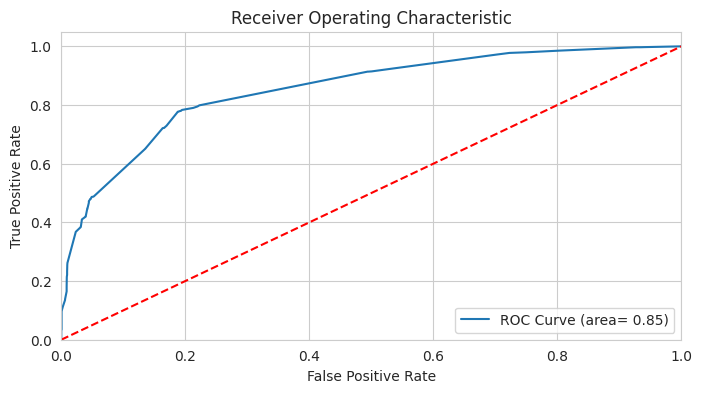

In [ ]:
# Calling the roc curve for plotting
lead_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

The curve is closer to the left border than to the right border hence our model is having great accuracy.The curve area is 85% of the total area.

Finding the Optimal Cutoff Point

In [ ]:
# 10 points are being created out of which we will only one point for cutoff point.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_probability.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.249600,302,1,1,1,0,0,0,0,0,0,0
6087,0,-0.007951,6087,0,0,0,0,0,0,0,0,0,0
1033,0,0.249600,1033,1,1,1,0,0,0,0,0,0,0
7656,0,0.303400,7656,1,1,1,1,0,0,0,0,0,0
3241,1,0.511976,3241,1,1,1,1,1,1,0,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding '__Accuracy__', '__Sensitivity__' and '__Specificity__' for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [ ]:
# Creating a dataframe to store all the values to be created
df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])
# from 0 to 0.9 with set size 0.1
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.424800    0.997117     0.071665
0.1          0.1  0.544397    0.977759     0.277001
0.2          0.2  0.554613    0.972405     0.296823
0.3          0.3  0.788307    0.790362     0.787039
0.4          0.4  0.798208    0.778007     0.810673
0.5          0.5  0.783278    0.652389     0.864041
0.6          0.6  0.769134    0.467051     0.955527
0.7          0.7  0.745560    0.384267     0.968488
0.8          0.8  0.709414    0.254119     0.990343
0.9          0.9  0.677039    0.167628     0.991360


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9. Out of this we have to choose one as a cutoff point and it is __probability cutoff = 0.3__ because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

Lets plot this data and see the convergence point for the 'accuracy', 'sensitivity' and 'specificity'.

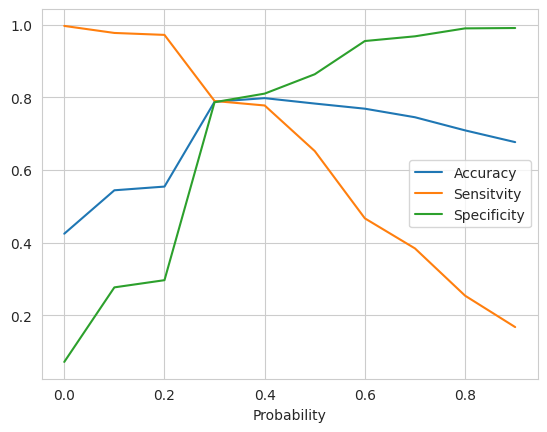

In [ ]:
# Plotting 'Accuracy', 'Sensitivity' and 'Specificity' for various possibilities from 0 to 0.9
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

- From the above graph it is prominent that __0.3__ is perfect for the probability cutoff.

In [ ]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
302,0,0.249600,302,1,1,1,0,0,0,0,0,0,0,0
6087,0,-0.007951,6087,0,0,0,0,0,0,0,0,0,0,0
1033,0,0.249600,1033,1,1,1,0,0,0,0,0,0,0,0
7656,0,0.303400,7656,1,1,1,1,0,0,0,0,0,0,1
3241,1,0.511976,3241,1,1,1,1,1,1,0,0,0,0,1


## Step 9: Precision and Recall

In [ ]:
# Creating confusion matrix to find precision and recall score
confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3097,  838],
       [ 509, 1919]])

In [ ]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))

Precision 0.6960464272760246
Recall 0.7903624382207578


The precison percentage is __69.60% (~70%)__  and recall percentage is __79%__.

## Step 10: Precision and Recall Trade-Off

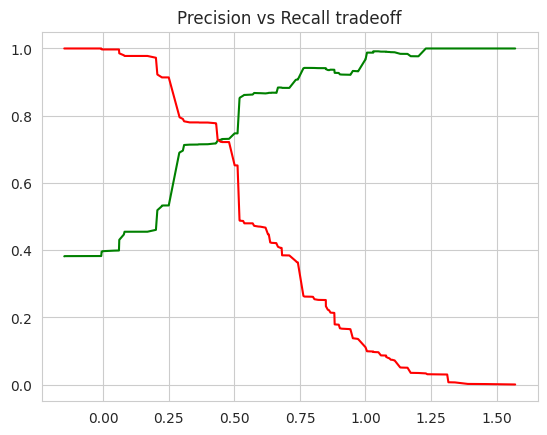

In [ ]:
# Creating precision recall curve by creating three points and plotting
p ,r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Prediction on the test dataset

#### Scaling the dataset

In [ ]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

#### Predicting

In [ ]:
# Predicting the test dataset with our final model
test_cols = X_train_4.columns[1:]
X_test_final = X_test[test_cols]
X_test_final = sm.add_constant(X_test_final)
y_pred_test = reg4.predict(X_test_final)

In [ ]:
# Creating a new dataset and saving the prediction values in it
y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,ID
6906,1,0.953337,6906
1873,0,0.075041,1873
771,0,0.066225,771
4495,0,0.106299,4495
9061,1,0.750819,9061


##Step 12: Model Evaluation

In [ ]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_Probability'].map(lambda x:1 if x>0.3 else 0 )
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
6906,1,0.953337,6906,1
1873,0,0.075041,1873,0
771,0,0.066225,771,0
4495,0,0.106299,4495,0
9061,1,0.750819,9061,1


In [ ]:
# Checking the Accuracy, Precision and Recall score of the train dataset.
print('Accuracy score in predicting train dataset :', metrics.accuracy_score(y_train_pred_final.Converted,
                                                                           y_train_pred_final.Predicted))
print('Precision score in predicting train dataset:',precision_score(y_train_pred_final.Converted,
                                                                    y_train_pred_final.Predicted))

print('Recall score in predicting train dataset:',recall_score(y_train_pred_final.Converted,
                                                              y_train_pred_final.Predicted))

Accuracy score in predicting train dataset : 0.7883074021687884
Precision score in predicting train dataset: 0.6960464272760246
Recall score in predicting train dataset: 0.7903624382207578


In [ ]:
# Checking the Accuracy, Precision and Recall score of the test dataset.
print('Accuracy score in predicting test dataset :', metrics.accuracy_score(y_test_pred_final.Converted,
                                                                           y_test_pred_final.Predicted))
print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted,
                                                                    y_test_pred_final.Predicted))
print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted,
                                                              y_test_pred_final.Predicted))

Accuracy score in predicting test dataset : 0.7961129446277961
Precision score in predicting test dataset: 0.6976024748646559
Recall score in predicting test dataset: 0.845360824742268


## Step 13: Lead Score Assigning

In [ ]:
# Creating new columns for lead number and lead score
y_test_pred_final['Lead Number'] = lead_df.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
6906,1,0.953337,6906,1,596625,95
1873,0,0.075041,1873,0,641392,8
771,0,0.066225,771,0,652477,7
4495,0,0.106299,4495,0,616581,11
9061,1,0.750819,9061,1,580888,75
